In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv('/content/2-multiplegradesdataset.csv')

# EDA kısmı

In [65]:
df.head() # multiple feature

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [66]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [67]:
df.isnull().sum() # nan yok güzel temiz bir dataset demek

,0
Study Hours,0
Sleep Hours,0
Attendance Rate,0
Social Media Hours,0
Exam Score,0


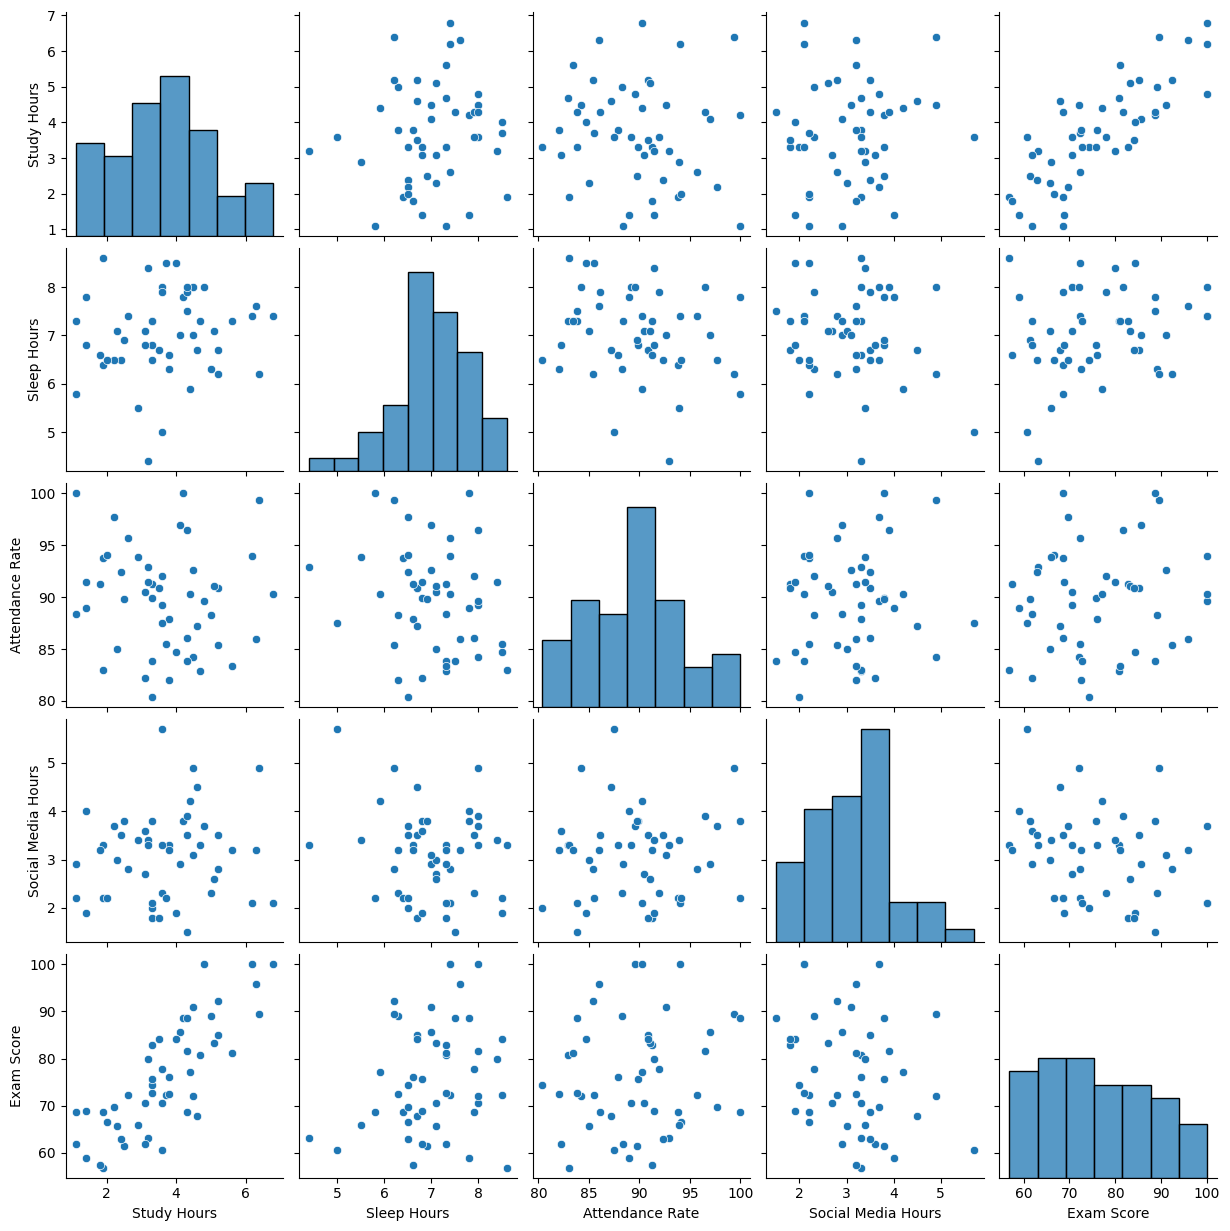

In [68]:
sns.pairplot(df) # burda feature değerler çok fazla birbirini etkilemezse bizim için iyi olur
plt.show()       # bu grafiklerden kendimi biraz analiz yapaliriz EDA bizim için output yai y değeri
                 # Exam Score örnek olarak Study Hours ve Exam Score a baktığımızda pozitif korelasyon görüyoruz

In [69]:
df.corr()


,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


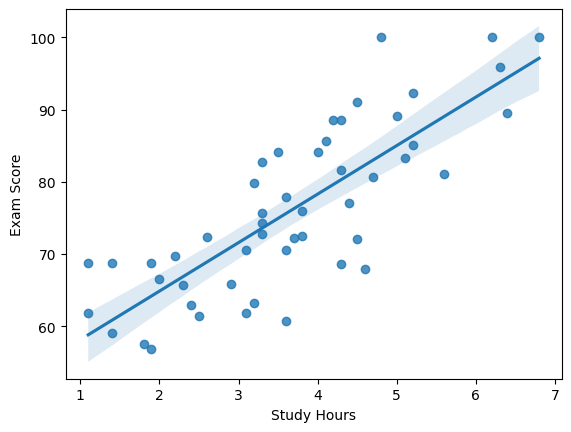

In [70]:
# seaborn kenince bir best fit line çizmeye çalışır
sns.regplot(x='Study Hours',y='Exam Score',data=df)
plt.show()

In [71]:
#independent and dependent features

In [72]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [73]:
X=df.iloc[:,:-1] # sondaki yani Exam Score hariç hepsini al demek
y=df.iloc[:,-1]  # yalnızca sondakini al demek
# X=df[["Study Hours","Sleep Hours","Attendance Rate","Social Media Hours"]]     aynı işleci gören 2 satır
# y=df["Exam Score"]

In [74]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [75]:
y.head()

,Exam Score
0,80.7
1,76.0
2,89.1
3,95.9
4,70.5


In [76]:
# train-test split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=15)

In [79]:
X_train.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
9,4.8,8.0,89.6,3.7
44,1.8,6.6,91.3,3.2
47,5.6,7.3,83.4,3.2
49,1.4,6.8,91.5,1.9
22,4.1,7.0,97.0,2.9


In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [82]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [83]:
X_train

array([[ 7.64922342e-01,  1.07637448e+00,  2.70413080e-03,
         6.75932027e-01],
       [-1.60676425e+00, -3.94765312e-01,  3.42883785e-01,
         1.46070057e-01],
       [ 1.39737210e+00,  3.40804586e-01, -1.23795108e+00,
         1.46070057e-01],
       [-1.92298913e+00, -1.84602484e-01,  3.82904921e-01,
        -1.23157107e+00],
       [ 2.11528804e-01,  2.55603439e-02,  1.48348616e+00,
        -1.71847126e-01],
       [ 2.90585024e-01,  8.66211656e-01,  2.08380319e+00,
         7.81904421e-01],
       [-2.56398550e-02, -7.10009554e-01, -1.51809903e+00,
         1.46070057e-01],
       [ 9.23034781e-01, -7.10009554e-01, -2.57433252e-01,
        -8.07681490e-01],
       [-4.20920953e-01,  3.40804586e-01, -1.15790881e+00,
        -1.01962628e+00],
       [-2.56398550e-02, -3.94765312e-01, -3.37475524e-01,
         2.52042451e-01],
       [ 3.69641243e-01,  5.50967414e-01, -1.15790881e+00,
        -1.65546064e+00],
       [-9.74314491e-01,  4.45886000e-01,  1.22334877e+00,
      

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
regression=LinearRegression()

In [86]:
regression.fit(X_train,y_train)

LinearRegression()

In [87]:
df.iloc[0]

,0
Study Hours,4.7
Sleep Hours,7.3
Attendance Rate,82.9
Social Media Hours,3.3
Exam Score,80.7


In [88]:
new_student=[[5,7,90,2]]#Study Hours=5 / Sleep Hours=7  /  Attendance Rate=90  /  Social Media Hours=2 / Exam Score =? tahmin edeceğiz

In [89]:
new_student_scaled=scaler.transform(new_student)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [90]:
regression.predict(new_student_scaled) #Study Hours=5 / Sleep Hours=7  /  Attendance Rate=90  /  Social Media Hours=2 / Exam Score u  90.88471349 olur tahmini

array([90.88471349])

In [91]:
#prediction

In [92]:
y_pred=regression.predict(X_test)# X_test değerleri için tahminlerimiz

In [93]:
y_pred

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [95]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 3.277026485962786
MSE: 14.600589378986257
RMSE: 3.8210717578954543


In [96]:
r2=r2_score(y_test,y_pred)
print("R2:",r2)

R2: 0.915670734577271


In [97]:
# adjusted r2
adj=1-(1-r2)*len((y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2:",adj)

Adjusted R2: 0.8629649436880653


In [98]:
residuals=y_test-y_pred

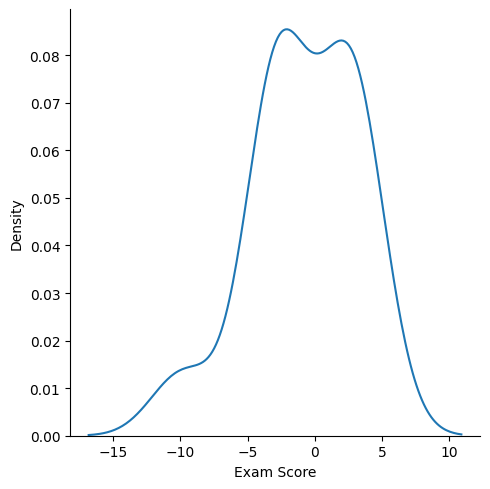

In [99]:
sns.displot(residuals,kind="kde")
plt.show()

In [100]:
regression.intercept_

np.float64(77.41081081081082)

In [101]:
regression.coef_

array([ 9.28014703,  1.78967062,  3.24340001, -4.08127695])

In [102]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [109]:
# tahmin yapalım
students=[[5,6,89,2],[7,6,77,1],[2,8,69,5],[4,8,74,3]]

In [110]:
regression.predict(scaler.transform(students))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([88.35507953, 99.56490014, 44.15116576, 70.7194002 ])